#### **Question 1** : **Credit Default Problem**
Create a synthetic dataset  for the credit default problem. You may choose priors suitably. Generate 10^4 points from you model. Using the generated dataset evaluate <br>
a) bayes classifier <br>
 b) classifier which has a randomization built in. 

In [ ]:
import numpy as np

# Create Synthetic Dataset

mu_0 , mu_1 , sigma_0, sigma_1 = -1, 1, 1, 1
p0 = 0.8
p1 = 1 - p0

# Input arguments : p0 = prior probability of being non-defaulter, N = sample size 
def create_dataset(N=10**4):
    D = [] # Dataset list to store pairs (X_cur, y_cur)
    Y = np.random.choice([0,1], size= N, p=[p0,p1]) 
    for y_cur in Y : 
      if y_cur == 0 : 
        X_cur = np.random.normal(loc=mu_0,scale=sigma_0, size=1)  # f0(X) ~ N(-1,1)
        D.append([X_cur[0],y_cur])

      if y_cur == 1 : 
        X_cur = np.random.normal(loc=mu_1, scale=sigma_1, size =1) # f1(X) ~ N(1,1)
        D.append([X_cur[0],y_cur])
    return D 


In [ ]:
# Part (a) - Bayes Classifier 

def f_0(X) : 
  return (1/( (2*np.pi)**0.5) * sigma_0)*np.exp( - (X - mu_0)**2/(2*sigma_0**2) )

def f_1(X) : 
  return (1/( (2*np.pi)**0.5) * sigma_1)*np.exp( - (X - mu_1)**2/(2*sigma_1**2) )

def q_0(X):
  return p0*f_0(X)/(p0*f_0(X) + p1*f_1(X) )

def q_1(X): 
  return p1*f_1(X)/( p0*f_0(X) + p1*f_1(X) )

def bayes_classifier(X) : 
  return q_1(X) >= q_0(X) # element wise comparisions



In [ ]:
# Simulation of accuracy 

def one_simulation():
  D = np.array(create_dataset())   
  X = np.array([x[0] for x in D])
  Y = np.array([x[1]==1 for x in D])
  C = bayes_classifier(X)
  accuracy = sum( [C[i] == Y[i] for i in range(len(C))])/ len(C)
  return accuracy 

def n_simulations(N = 300) : 
  acc_list = []
  for i in range(N):
    acc_list.append( one_simulation() )
  return acc_list
acc_list = n_simulations()


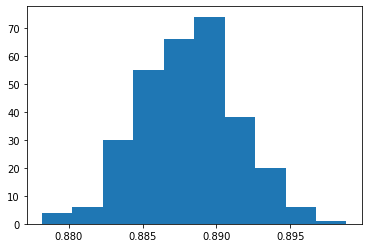

In [ ]:
import matplotlib.pyplot as plt
plt.hist(acc_list,bins=10)
plt.show()

In [ ]:
# Part (b) # Random Classifier based on random variable Z denoting coin toss  with success probability q0 = p0

# h_B(X,Z) = Z 
def random_classifier(X): 
  # coin toss Z 
  q0 = p0 # P(Z = 0) = P( Z = 'Head' ) = P( Z = 'Non-Defaulter' )
  Z = np.random.choice([0,1],size=len(X),p=[q0,1-q0])
  return Z

In [ ]:
# Simulation of accuracy 

def one_simulation():
  D = np.array(create_dataset())
  X = np.array([x[0] for x in D])
  Y = np.array([x[1] for x in D])
  C = random_classifier(X)
  accuracy = sum( [C[i] == Y[i] for i in range(len(C))])/ len(C)
  return accuracy 

def n_simulations(N = 300) : 
  acc_list = []
  for i in range(N):
    acc_list.append( one_simulation() )
  return acc_list
acc_list = n_simulations()


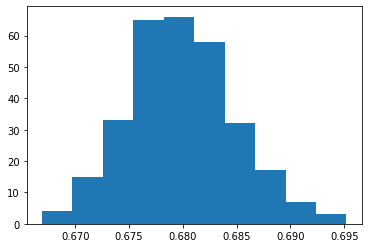

In [ ]:
import matplotlib.pyplot as plt
plt.hist(acc_list,bins=10)
plt.show()